# **Basics Of Machine Learning**

---



# Expt 1 & 2 : Extract the data from dataset/database using python

## IMPORT DATA

In [ ]:
import pandas as pd
import numpy as np

#columns=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
red=pd.read_csv('/content/winequality-red.csv', delimiter=';')
white=pd.read_csv('/content/winequality-white.csv', delimiter=';')
red['type']='red'
white['type']='white'
mw=pd.concat([red,white],axis=0,ignore_index=True)

In [ ]:
mw.head()

In [ ]:
mw.describe()

In [ ]:
mw.info()

In [ ]:
mw.size

In [ ]:
mw.shape

## Preprocessing the Data

In [ ]:
mw.isnull().sum()

In [ ]:
mw.isna().sum()

In [ ]:
mw.notnull().sum()

In [ ]:
mw.duplicated().sum()

In [ ]:
mw.drop_duplicates(inplace=True)
mw

## Encoding The Target Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

mw['type']=le.fit_transform(mw['type'])

mw

## Training

In [ ]:
x = mw[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
y = mw['type']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

x_train

# Expt 3 : Logistic Regression & Linear Regression

## Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test,y_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.score(x_test,y_test)

# Expt 4 : Naive Bayes

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.9671052631578947

# Expt 7 : K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.3f}%")

# Expt 8 : K-Means Clustring

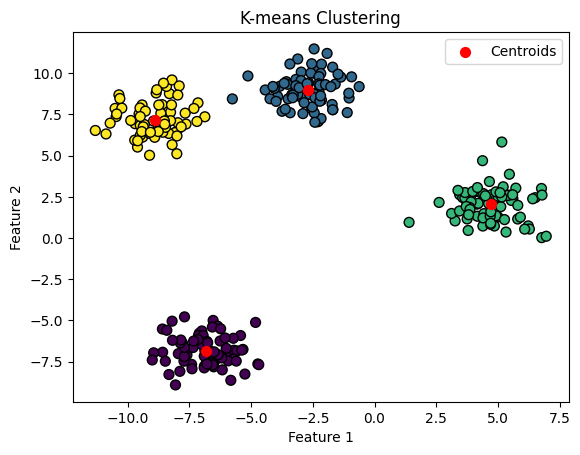

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data (for example, 2D data)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a KMeans object with the desired number of clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Get the labels (which cluster each point belongs to)
labels = kmeans.labels_

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='.', s=200, label="Centroids")
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
